In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import preprocessing
import seaborn as sns
import scipy
import plotly.express as px
import os

In [4]:
file_path = os.getcwd()

In [5]:
data = pd.read_excel(os.path.join(file_path, 'Dataset.xlsx'), sheet_name='Data' , nrows=10000)

In [5]:
data.head()

,authfull,inst_name,cntry,np6021,firstyr,lastyr,rank (ns),nc9621 (ns),h21 (ns),hm21 (ns),...,nc9621_d,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
0,"Grätzel, Michael",Ecole Polytechnique Fédérale de Lausanne,che,1645,1971,2022,1,318947,252,111.716063,...,3731,Organic Chemistry,0.228027,Nanoscience & Nanotechnology,0.205900,Enabling & Strategic Technologies,0.359557,1,1,205273
1,"Willett, Walter C.",Harvard T.H. Chan School of Public Health,usa,2251,1970,2022,2,302008,284,114.998761,...,3186,General & Internal Medicine,0.277678,Oncology & Carcinogenesis,0.203870,Clinical Medicine,0.767327,1,1,648015
2,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1870,1986,2020,3,205724,218,113.800387,...,3563,Nanoscience & Nanotechnology,0.580767,Applied Physics,0.190167,Enabling & Strategic Technologies,0.652080,1,1,90797
3,"Kessler, Ronald C.",Harvard Medical School,usa,1068,1975,2022,4,226033,222,82.578200,...,1154,Psychiatry,0.593090,General & Internal Medicine,0.078695,Clinical Medicine,0.823417,1,1,66599
4,"Kresse, Georg",Universität Wien,aut,374,1992,2022,5,234452,102,47.036629,...,728,Applied Physics,0.612299,Chemical Physics,0.163102,Physics & Astronomy,0.911765,1,1,380123


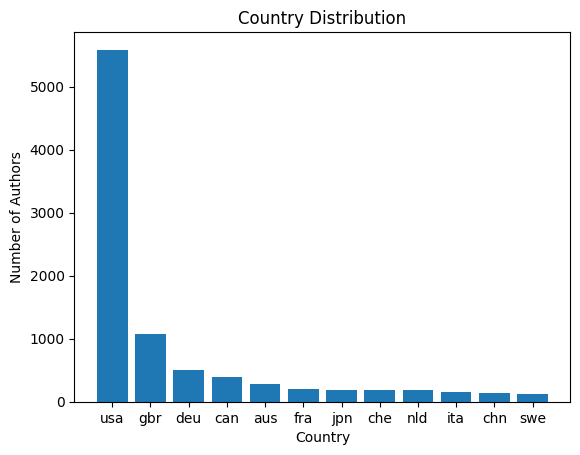

In [7]:
c = data['cntry'].value_counts()
c = c[c > 100]
labels = c.index
sizes = c.values

fig, ax = plot.subplots()
ax.bar(labels, sizes)
ax.set_title('Country Distribution')
ax.set_ylabel('Number of Authors')
ax.set_xlabel('Country')
plot.show()

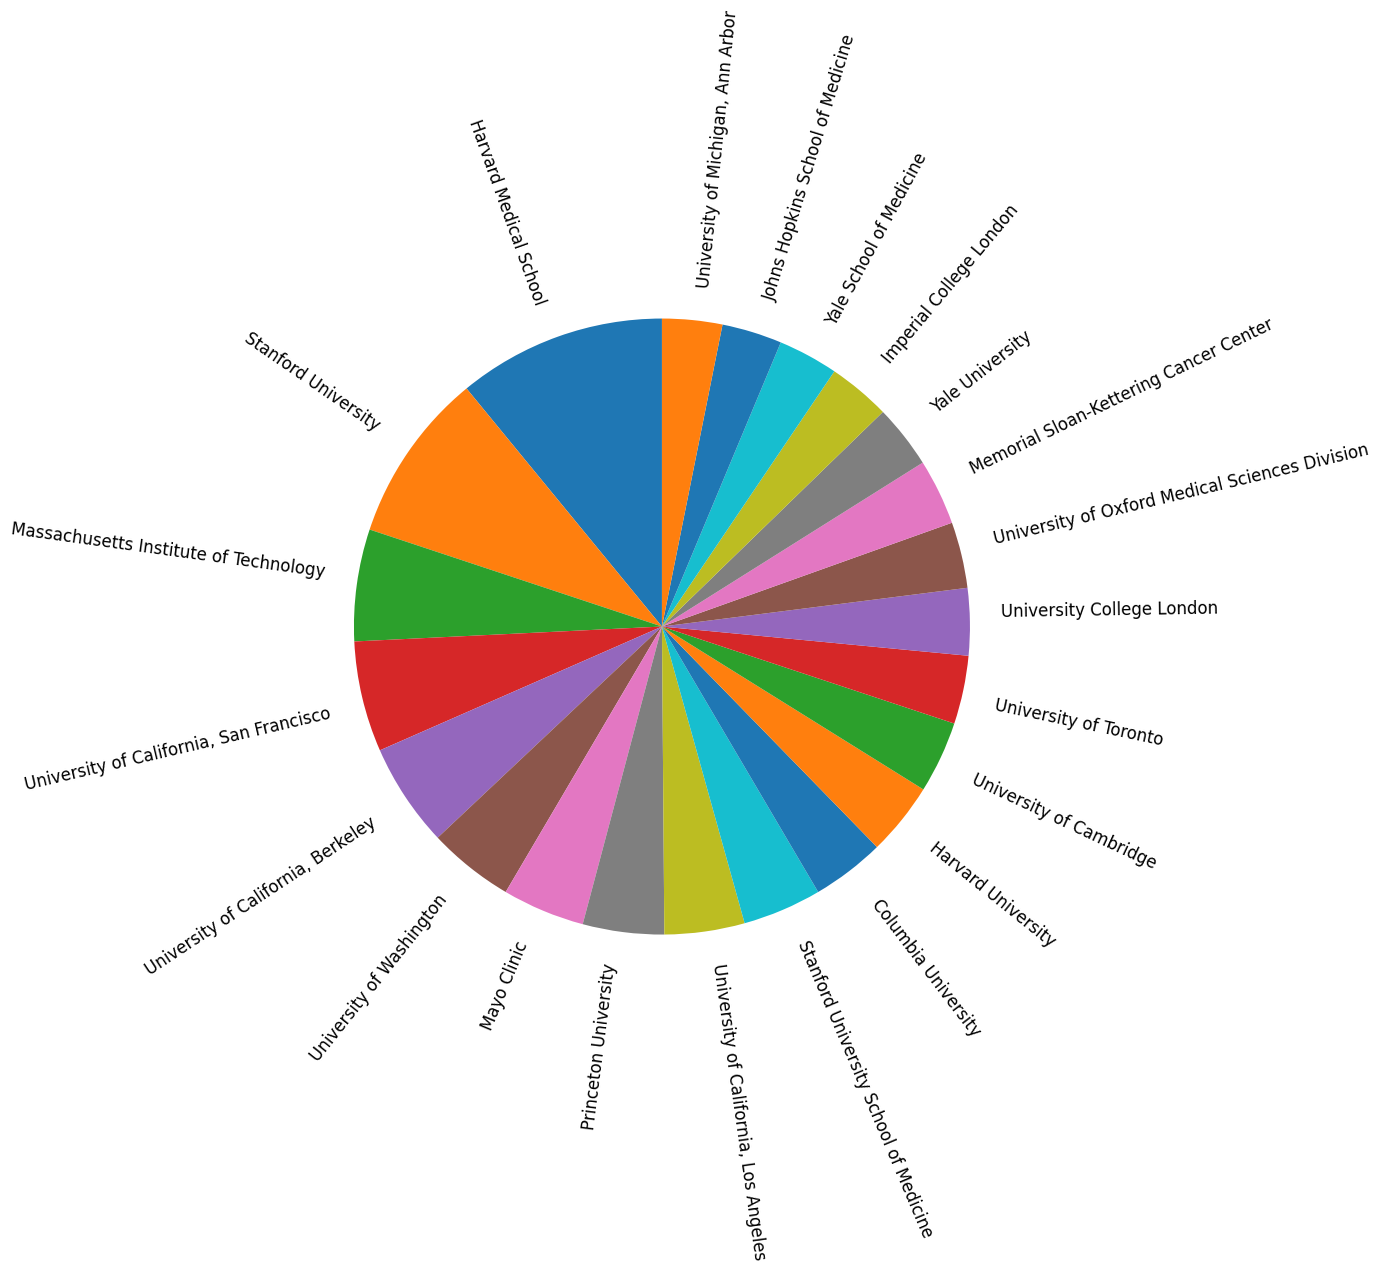

In [ ]:
institutions = data['inst_name'].value_counts()
institutions = institutions[institutions > 50]
labels = institutions.index
sizes = institutions.values
plot.pyplot.pie(sizes, labels=labels, labeldistance=1.1, startangle=90, rotatelabels=True, textprops={'fontsize': 12})
plot.pyplot.show()

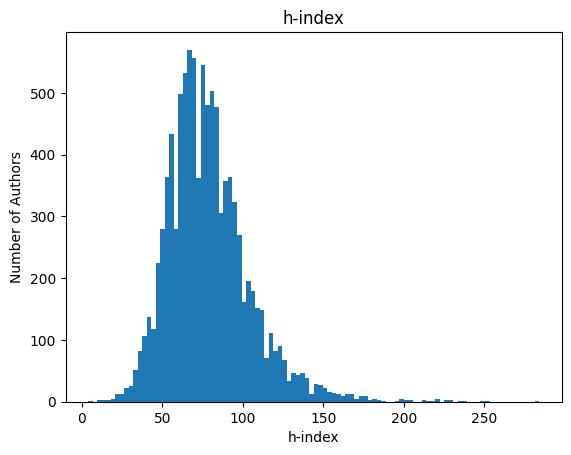

In [ ]:
h_index = data['h21 (ns)']
plot.pyplot.title('h-index')
plot.pyplot.hist(h_index, bins=100)
plot.pyplot.xlabel('h-index')
plot.pyplot.ylabel('Number of Authors')
plot.pyplot.show()

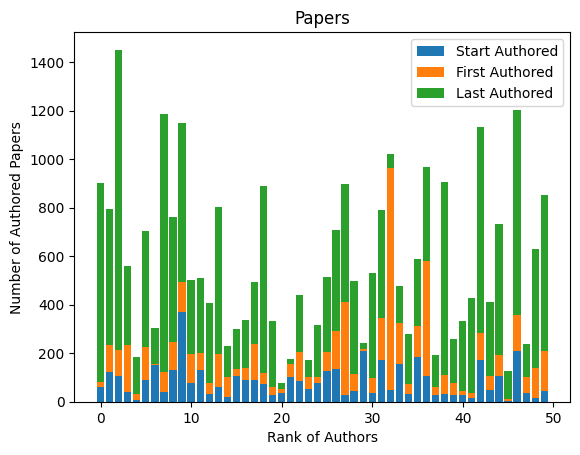

In [ ]:
data_top50 = data.head(50)

start_authored = data_top50['nps (ns)'] 
first_authored = data_top50['cpsf (ns)'] 
last_authored = data_top50['npsfl (ns)'] 

last_authored = last_authored - first_authored
first_authored = first_authored - start_authored

fig, ax = plot.subplots()

ax.set_title('Papers')
ax.set_ylabel('Number of Authored Papers')
ax.set_xlabel('Rank of Authors')

plot.bar(np.arange(len(start_authored)), start_authored, label='Start Authored')
plot.bar(np.arange(len(first_authored)), first_authored, bottom=start_authored, label='First Authored')
plot.bar(np.arange(len(last_authored)), last_authored, bottom=start_authored+first_authored, label='Last Authored')

plot.legend()
plot.show()


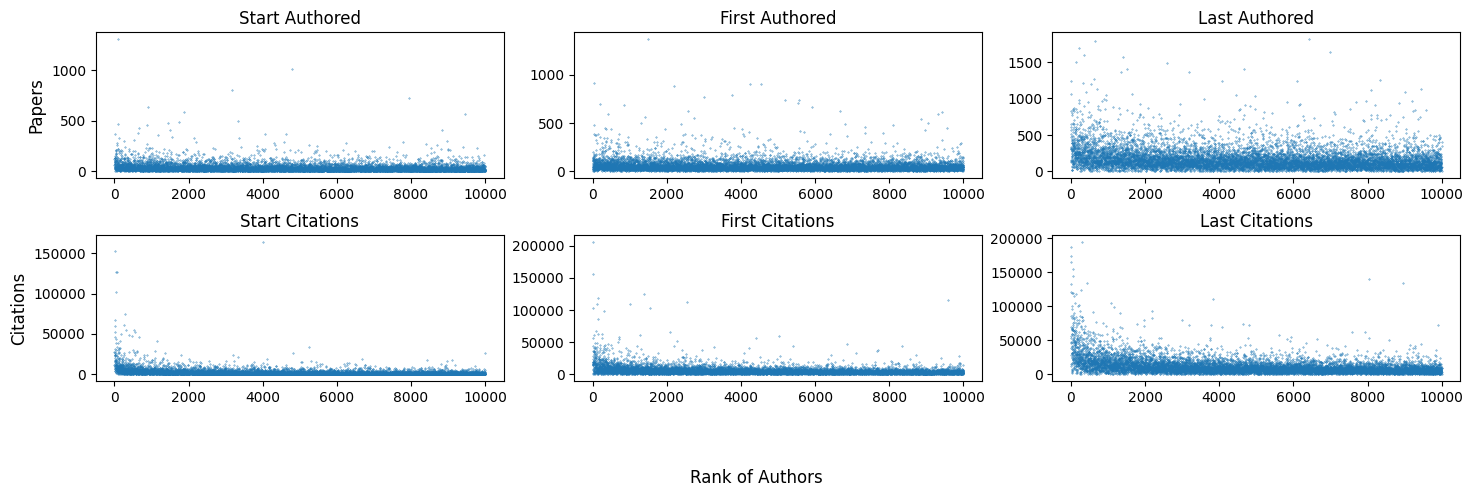

In [ ]:
data_top = data.head(10000)

start_authored = data_top['nps (ns)'] 
first_authored = data_top['cpsf (ns)'] 
last_authored = data_top['npsfl (ns)'] 

start_citations = data_top['ncs (ns)']
first_citations = data_top['ncsf (ns)']
last_citations = data_top['ncsfl (ns)']

last_authored = last_authored - first_authored
first_authored = first_authored - start_authored
last_citations = last_citations - first_citations
first_citations = first_citations - start_citations

fig, axs = plot.subplots(2, 3, figsize=(15, 5))

fig.supxlabel('Rank of Authors')
for ax, row in zip(axs[:,0], ['Papers', 'Citations']):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout(h_pad=2, w_pad=2, pad=2.5)

axs[0][0].scatter(np.arange(len(start_authored)), start_authored, label='Start Authored', s=0.1)
axs[0][0].set_title('Start Authored')

axs[0][1].scatter(np.arange(len(first_authored)), first_authored, label='First Authored', s=0.1)
axs[0][1].set_title('First Authored')

axs[0][2].scatter(np.arange(len(last_authored)), last_authored, label='Last Authored', s=0.1)
axs[0][2].set_title('Last Authored')

axs[1][0].scatter(np.arange(len(start_citations)), start_citations, label='Start Citations', s=0.1)
axs[1][0].set_title('Start Citations')

axs[1][1].scatter(np.arange(len(first_citations)), first_citations, label='First Citations', s=0.1)
axs[1][1].set_title('First Citations')

axs[1][2].scatter(np.arange(len(last_citations)), last_citations, label='Last Citations', s=0.1)
axs[1][2].set_title('Last Citations')

plot.show()


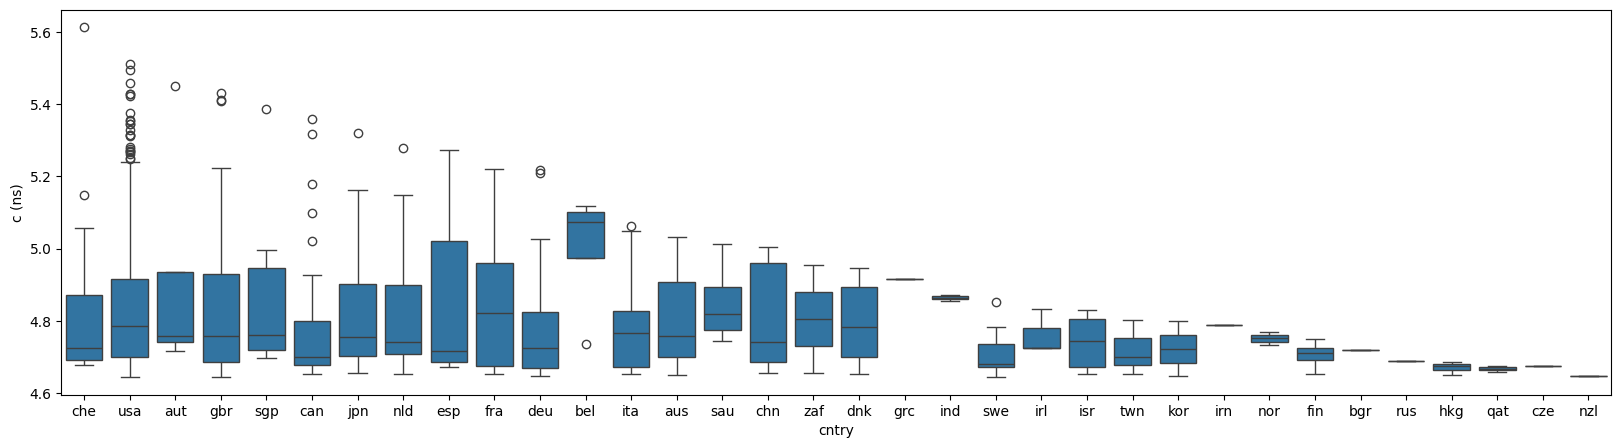

In [17]:
data_top = data.head(1000)
value = pd.concat([data_top['c (ns)'], data_top['cntry']], axis=1)

sns.boxplot(x='cntry', y="c (ns)", data=value)
plot.gcf().set_size_inches(20, 5)
plot.show()

In [87]:
from plotly import graph_objects as go

global_mean_c = data['c (ns)'].mean()
global_mean_nps = data['nps (ns)'].mean()
global_mean_ncs = data['ncs (ns)'].mean()
global_mean_h_index = data['h21 (ns)'].mean()
global_mean_rank = data['rank (ns)'].mean()

inst = data['inst_name'].value_counts()[:3].index

fig = go.Figure()
fig.update_layout(width=800, height=800)
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 1.5])))

for i in range(len(inst)):
    data_inst = data[data['inst_name'] == inst[i]]
    
    c = data_inst['c (ns)'].mean() / global_mean_c
    nps = data_inst['nps (ns)'].mean()/ global_mean_nps
    ncs = data_inst['ncs (ns)'].mean() / global_mean_ncs
    h_index = data_inst['h21 (ns)'].mean() / global_mean_h_index
    rank = data_inst['rank (ns)'].mean() / global_mean_rank

    fig.add_trace(
        go.Scatterpolar(
            theta=['C-Score','Papers','Citations','h-index','Rank'],
            r=[c, nps, ncs, h_index, rank],
            fill='toself',
            name=inst[i]
        ),
    )

fig.show()

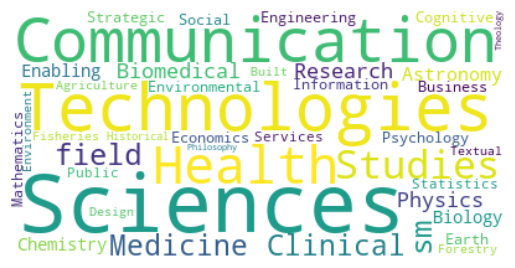

In [98]:
from wordcloud import WordCloud

topics = data['sm-field'].value_counts()

wordcloud = WordCloud(background_color='white').generate(topics.to_string()) 

plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')
plot.show()


In [126]:
import plotly.express as px

df = data['cntry'].value_counts().reset_index()[2:]
df['cntry'] = df['cntry'].str.upper()

fig = px.choropleth(df, locations="cntry", color='count', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()